# The Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
#from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
import pickle
import math

# Read Data

In [5]:
#Read our decision Matrix
data = pd.read_csv("Data/Matrix.csv")
data

,Node,DC,BC,CC,EC
0,0,0.085934,1.463059e-01,0.353343,3.391796e-05
1,1,0.004210,2.783274e-06,0.261376,6.045346e-07
2,2,0.002476,7.595021e-08,0.261258,2.233461e-07
3,3,0.004210,1.685066e-06,0.261376,6.635648e-07
4,4,0.002476,1.840332e-07,0.261258,2.236416e-07
...,...,...,...,...,...
4034,4034,0.000495,0.000000e+00,0.183989,2.951270e-10
4035,4035,0.000248,0.000000e+00,0.183980,2.912901e-10
4036,4036,0.000495,0.000000e+00,0.183989,2.931223e-10
4037,4037,0.000991,7.156847e-08,0.184005,2.989233e-10


In [6]:
X = data[["DC","BC","CC","EC"]]
#pca = PCA(2)
X

,DC,BC,CC,EC
0,0.085934,1.463059e-01,0.353343,3.391796e-05
1,0.004210,2.783274e-06,0.261376,6.045346e-07
2,0.002476,7.595021e-08,0.261258,2.233461e-07
3,0.004210,1.685066e-06,0.261376,6.635648e-07
4,0.002476,1.840332e-07,0.261258,2.236416e-07
...,...,...,...,...
4034,0.000495,0.000000e+00,0.183989,2.951270e-10
4035,0.000248,0.000000e+00,0.183980,2.912901e-10
4036,0.000495,0.000000e+00,0.183989,2.931223e-10
4037,0.000991,7.156847e-08,0.184005,2.989233e-10


In [48]:
#read the 10 influential nodes
influential = pd.read_csv("Data/res.csv")
inf10 = influential.head(13)
inf10

,Node,DC,BC,CC,EC,S+,S-,C
0,107,0.258791,0.480518,0.459699,2.606940e-04,0.019029,0.200396,0.913277
1,1684,0.196137,0.337797,0.393606,7.164260e-06,0.061948,0.141539,0.695566
2,1912,0.186974,0.229295,0.350947,9.540696e-02,0.102563,0.100961,0.496063
3,3437,0.135463,0.236115,0.314413,9.531613e-08,0.103349,0.098846,0.488865
4,0,0.085934,0.146306,0.353343,3.391796e-05,0.140349,0.061395,0.304321
5,1085,0.016345,0.149015,0.357852,3.164082e-06,0.142845,0.060458,0.297379
6,698,0.016840,0.115330,0.271189,1.116876e-09,0.155715,0.046803,0.231106
7,567,0.015602,0.096310,0.328881,9.932295e-06,0.163087,0.039165,0.193646
8,58,0.002972,0.084360,0.397402,5.898120e-04,0.168330,0.034346,0.169464
9,428,0.028479,0.064309,0.394837,5.990065e-04,0.174851,0.026805,0.132923


In [49]:
#convert it to numpy array
Y = inf10[["DC","BC","CC","EC"]]
Yrr = Y.to_numpy()
Yrr

array([[2.58791481e-01, 4.80518079e-01, 4.59699454e-01, 2.60693991e-04],
       [1.96136701e-01, 3.37797450e-01, 3.93605615e-01, 7.16425979e-06],
       [1.86973749e-01, 2.29295340e-01, 3.50947332e-01, 9.54069615e-02],
       [1.35463101e-01, 2.36115357e-01, 3.14412520e-01, 9.53161293e-08],
       [8.59336305e-02, 1.46305921e-01, 3.53342667e-01, 3.39179617e-05],
       [1.63447251e-02, 1.49015092e-01, 3.57851826e-01, 3.16408207e-06],
       [1.68400198e-02, 1.15330450e-01, 2.71188717e-01, 1.11687629e-09],
       [1.56017831e-02, 9.63103312e-02, 3.28880925e-01, 9.93229483e-06],
       [2.97176820e-03, 8.43602059e-02, 3.97401831e-01, 5.89812015e-04],
       [2.84794453e-02, 6.43090624e-02, 3.94837196e-01, 5.99006469e-04],
       [2.25359089e-02, 6.27802285e-02, 3.93912789e-01, 6.01194972e-04],
       [4.95294700e-04, 5.78259069e-02, 3.14927468e-01, 4.60121163e-08],
       [3.93759287e-02, 4.76333730e-02, 3.69543333e-01, 1.21341498e-05]])

# KMeans Application

In [50]:
kmeans = KMeans(n_clusters=13, init=Yrr, max_iter=20000, n_init=10, random_state=0).fit(X)

C:\Users\Visitor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [51]:
#Communities
label=kmeans.fit_predict(X)
for i in (label):
    print(i)

C:\Users\Visitor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


4
11
11
11
11
11
11
9
11
11
11
11
11
11
11
11
11
11
11
11
11
9
11
11
11
11
11
11
11
11
11
11
11
11
12
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
9
11
8
11
11
11
11
11
9
11
11
9
11
11
11
11
11
11
11
11
11
11
11
11
9
11
11
11
11
11
11
9
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
9
11
11
11
0
11
11
11
11
11
11
11
11
11
11
11
9
9
11
9
11
11
9
11
11
11
11
11
11
11
11
11
11
9
11
11
11
11
11
11
11
11
11
9
11
11
11
9
11
11
11
11
11
9
11
11
11
11
11
11
9
11
11
9
11
11
9
11
10
11
9
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
9
11
11
11
11
11
11
11
11
9
11
11
11
9
11
11
11
11
11
11
11
11
11
11
9
11
11
11
9
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
9
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
9
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
9
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
9
11
11
11
9
11
11
11
11
11
11
9
11
11
11
11
11
11
9
11
9
11
11
11
11
11
11
11
11
11
11
11
11
11
11
9
11
11
11
11
11
11

11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
1

# Comparisons between Top K influential Nodes before and after KMeans

In [52]:
#centroîds after KMeans
centr = kmeans.cluster_centers_
centr

array([[2.58791481e-01, 4.80518079e-01, 4.59699454e-01, 2.60693991e-04],
       [1.96136701e-01, 3.37797450e-01, 3.93605615e-01, 7.16425979e-06],
       [1.86973749e-01, 2.29295340e-01, 3.50947332e-01, 9.54069615e-02],
       [1.35463101e-01, 2.36115357e-01, 3.14412520e-01, 9.53161293e-08],
       [8.59336305e-02, 1.46305921e-01, 3.53342667e-01, 3.39179617e-05],
       [1.63447251e-02, 1.49015092e-01, 3.57851826e-01, 3.16408207e-06],
       [4.04363183e-03, 2.66967577e-04, 1.88202765e-01, 7.86119277e-11],
       [1.09790325e-02, 8.98222294e-02, 3.04999037e-01, 3.32647461e-06],
       [3.59707776e-02, 4.80646011e-02, 3.76162085e-01, 1.68968514e-03],
       [1.03953417e-02, 1.28084727e-04, 2.81132843e-01, 7.19860806e-04],
       [1.40092730e-02, 9.97083166e-04, 3.39030694e-01, 7.27050907e-05],
       [9.92032357e-03, 3.20448811e-05, 2.53069866e-01, 1.05812368e-02],
       [1.30409024e-02, 3.84915134e-05, 3.16323858e-01, 1.62359587e-05]])

In [12]:
def distance_euclidean(data,center,j):
    T= pd.DataFrame()
    for i in range(len(data)):
        distance=math.sqrt((data['DC'][i]-center[j][0])**2+(data['BC'][i]-center[j][1])**2+
                           (data['CC'][i]-center[j][2])**2+(data['EC'][i]-center[j][3])**2)
        T=T.append({'Node':data['Node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
    return T.sort_values(by='distance from center')

In [67]:
Res= pd.DataFrame()
for i in range(13):
    T=distance_euclidean(data,centr,i)
    Res=Res.append({'cluster':str(i), 'Node_before_KMeans':str(inf10['Node'][i]),
                    'Node_after_KMeans':int(T.head(1)['Node']),
                    'distance from center':float(T.head(1)['distance from center'])},ignore_index=True)

In [68]:
Res

,Node_after_KMeans,Node_before_KMeans,cluster,distance from center
0,107.0,107,0,0.000000e+00
1,1684.0,1684,1,1.270549e-19
2,1912.0,1912,2,0.000000e+00
3,3437.0,3437,3,6.950964e-20
4,0.0,0,4,3.388132e-20
5,1085.0,1085,5,1.223963e-19
6,4023.0,698,6,4.109180e-03
7,567.0,567,7,2.517558e-02
8,414.0,58,8,7.642190e-03
9,3177.0,428,9,2.251279e-03


In [70]:
Res["Node_after_KMeans"] = Res["Node_after_KMeans"].astype(int)

In [71]:
Res

,Node_after_KMeans,Node_before_KMeans,cluster,distance from center
0,107,107,0,0.000000e+00
1,1684,1684,1,1.270549e-19
2,1912,1912,2,0.000000e+00
3,3437,3437,3,6.950964e-20
4,0,0,4,3.388132e-20
5,1085,1085,5,1.223963e-19
6,4023,698,6,4.109180e-03
7,567,567,7,2.517558e-02
8,414,58,8,7.642190e-03
9,3177,428,9,2.251279e-03


In [53]:
#convert to DataFrame
lab = pd.DataFrame(label, columns=['center'])
lab

,center
0,4
1,11
2,11
3,11
4,11
...,...
4034,6
4035,6
4036,6
4037,6


In [54]:
#Community of each Node
community = pd.concat([data, lab], axis=1)
community.head(20)

,Node,DC,BC,CC,EC,center
0,0,0.085934,1.463059e-01,0.353343,3.391796e-05,4
1,1,0.004210,2.783274e-06,0.261376,6.045346e-07,11
2,2,0.002476,7.595021e-08,0.261258,2.233461e-07,11
3,3,0.004210,1.685066e-06,0.261376,6.635648e-07,11
4,4,0.002476,1.840332e-07,0.261258,2.236416e-07,11
5,5,0.003219,2.205964e-06,0.261308,1.183322e-06,11
6,6,0.001486,2.453776e-08,0.261190,2.170904e-07,11
7,7,0.004953,1.702985e-04,0.274769,2.568510e-05,9
8,8,0.001981,2.760498e-07,0.261224,2.197375e-07,11
9,9,0.014116,1.645424e-05,0.262055,2.214117e-06,11


In [55]:
gk = community.groupby('center')
gk.first()

,Node,DC,BC,CC,EC
center,,,,,
0,107,0.258791,0.480518,0.459699,2.606940e-04
1,1684,0.196137,0.337797,0.393606,7.164260e-06
2,1912,0.186974,0.229295,0.350947,9.540696e-02
3,3437,0.135463,0.236115,0.314413,9.531613e-08
4,0,0.085934,0.146306,0.353343,3.391796e-05
5,1085,0.016345,0.149015,0.357852,3.164082e-06
6,686,0.042100,0.029722,0.216910,9.353314e-12
7,567,0.015602,0.096310,0.328881,9.932295e-06
8,58,0.002972,0.084360,0.397402,5.898120e-04


In [56]:
#Regrouper les communitées dans une  list comm
#à l'intérieur de chaque liste on trouve les noeuds appartient à une communauté 
comm = []
for i in range(13):
    comm.append(gk.get_group(i)['Node'].tolist())

In [36]:
print("Nodes of community 4 ",comm[4],"\nNode of community 5 ",comm[5])

Nodes of community 4  [0, 1085, 567, 698] 
Node of community 5  [58, 171, 348, 414, 428, 353, 376, 420, 475, 483, 484, 563, 566, 580, 651, 1136, 1165, 1171, 1465, 1534, 1577, 1666, 1687, 1718]


In [46]:
print("Nodes of community 7 ",comm[7],"\nNode of community 8 ",comm[8],"\nNode of community 9 ",comm[9])

Nodes of community 7  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222

In [47]:
print("Nodes of community 0 ",comm[0],"\nNode of community 1 ",comm[1],"\nNode of community 2 ",comm[2],"\nNode of community 3 ",comm[3])

Nodes of community 0  [107] 
Node of community 1  [1684] 
Node of community 2  [1912] 
Node of community 3  [3437]


# Community Graph

In [57]:
Graph = nx.read_edgelist('Data/facebookData.txt',create_using=nx.Graph(),nodetype=int)

print(nx.info(Graph))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [58]:
with open('Data/networkShape.pkl', 'rb') as f:
    pos = pickle.load(f)

In [59]:
size=[]
for i in range(13):
    sslist=[]
    for j in comm[i]:
        list1=[107,1684,1912,3437,0,1085,698,567,58,428,563,860,414]
        if j in list1:
            sslist.append(3150)
        else:
            sslist.append(70)
    size.append(sslist)

In [60]:
keyList = inf10.Node.tolist()

In [61]:
myDict = {key: key for key in keyList}

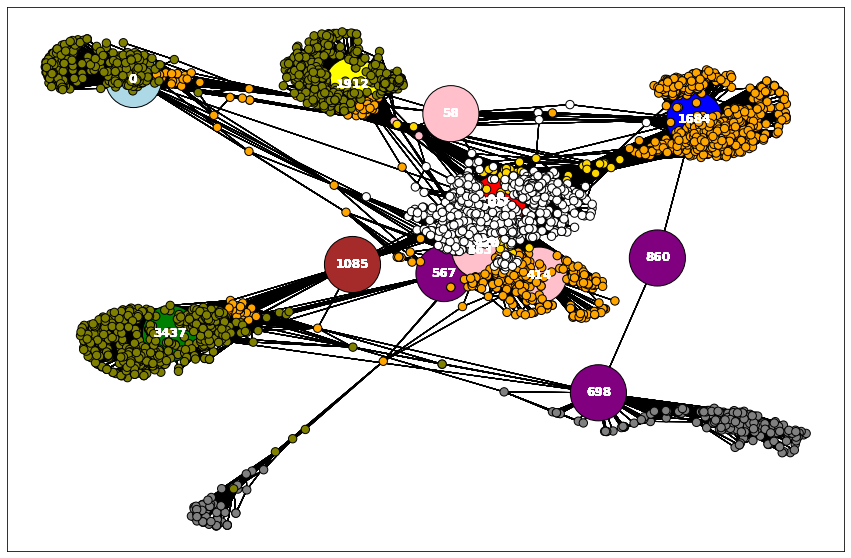

In [62]:
plt.rcParams.update({'figure.figsize': (15, 10)})
colors=['red','blue','yellow','green','lightblue','brown','grey','purple','pink','orange','gold','olive','white']
for i in range(13):
    nx.draw_networkx(Graph, pos=pos, nodelist=comm[i], node_color= colors[i],with_labels=False,node_size=size[i], font_size=8,
        edgecolors='black')
    labels=nx.draw_networkx_labels(Graph,pos = pos, labels=myDict, font_color='w', font_weight='bold')

In [82]:
keyList2 = Res.Node_after_KMeans.tolist()
myDict2 = {key: key for key in keyList2}

In [83]:
size2=[]
for i in range(10):
    sslist=[]
    for j in comm[i]:
        list1=Res.Node_after_KMeans.to_list()
        if j in list1:
            sslist.append(3150)
        else:
            sslist.append(70)
    size2.append(sslist)

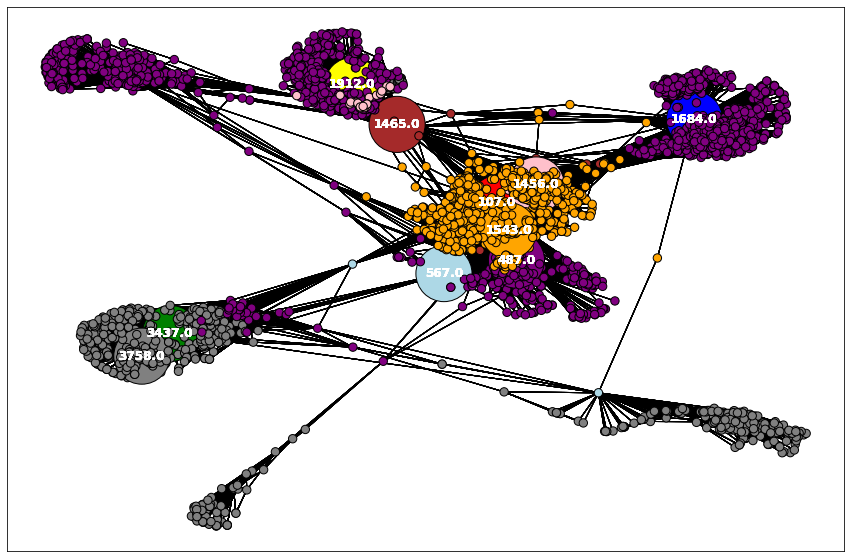

In [81]:
plt.rcParams.update({'figure.figsize': (15, 10)})
colors=['red','blue','yellow','green','lightblue','brown','grey','purple','pink','orange','gold','olive']
for i in range(10):
    nx.draw_networkx(Graph, pos=pos, nodelist=comm[i], node_color= colors[i],with_labels=False,node_size=size2[i], font_size=8,
        edgecolors='black')
    labels=nx.draw_networkx_labels(Graph,pos = pos, labels=myDict2, font_color='w', font_weight='bold')

# Plot the Community

<function matplotlib.pyplot.show(close=None, block=None)>

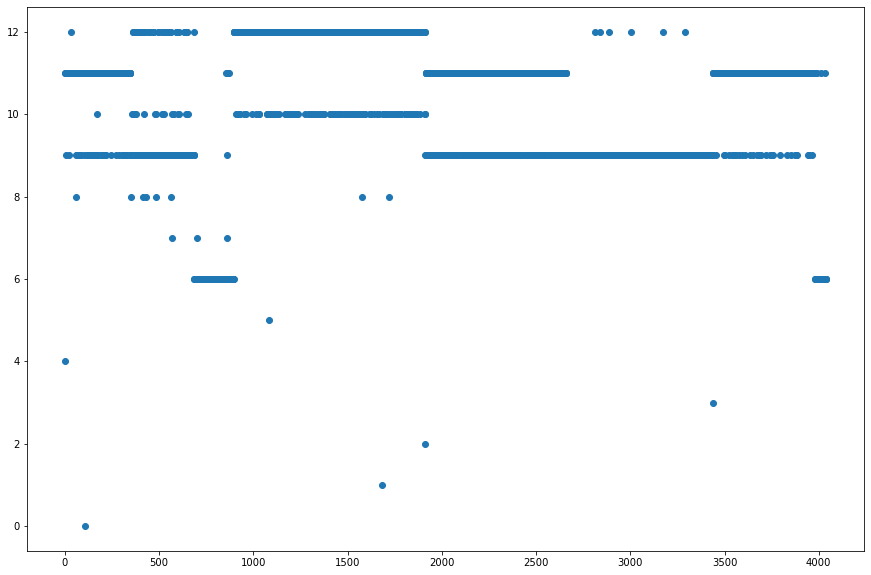

In [63]:
plt.scatter(community['Node'], community['center'])
plt.show